#Original Dataset: [Dogs vs Cats](https://www.kaggle.com/c/dogs-vs-cats)





In [1]:
#We have used the subset(2000 images) of the original dataset(25000 images) to reduce the training time.
#Downloading the subset of the full dataset
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /content/cats_and_dogs_filtered.zip

--2020-07-04 04:29:18--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 108.177.98.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/content/cats_and_dogs_filtered.zip’

/content/cats_and_d 100%[===================>]  65.43M   148MB/s    in 0.4s    

2020-07-04 04:29:18 (148 MB/s) - ‘/content/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [38]:
#Unzipping the datafile
import os
import zipfile

local_zip = '/content/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [39]:
main_dir = '/content/cats_and_dogs_filtered'

train_dir = os.path.join(main_dir, 'train')
validation_dir = os.path.join(main_dir, 'validation')

#Directory with training images of dogs/cats
train_dogs_dir = os.path.join(train_dir, 'dogs')
train_cats_dir = os.path.join(train_dir, 'cats')

#Directory with validation images of dogs/cats
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')

In [40]:
#Print the total training images for dogs/cats
print('Training images for Dogs: ',len(os.listdir(train_dogs_dir)))
print('Training images for Cats: ',len(os.listdir(train_cats_dir)))

#Print the total validation images for dogs/cats
print('Validation images for Dogs: ',len(os.listdir(validation_dogs_dir)))
print('Validation images for Cats: ',len(os.listdir(validation_cats_dir)))

#Displaying the first few filenames of training images
train_dogs_fname = os.listdir(train_dogs_dir)
train_cats_fname = os.listdir(train_cats_dir)

print(train_dogs_fname[:5])
print(train_cats_fname[:5])

Training images for Dogs:  1000
Training images for Cats:  1000
Validation images for Dogs:  500
Validation images for Cats:  500
['dog.565.jpg', 'dog.356.jpg', 'dog.612.jpg', 'dog.762.jpg', 'dog.263.jpg']
['cat.767.jpg', 'cat.332.jpg', 'cat.695.jpg', 'cat.456.jpg', 'cat.24.jpg']


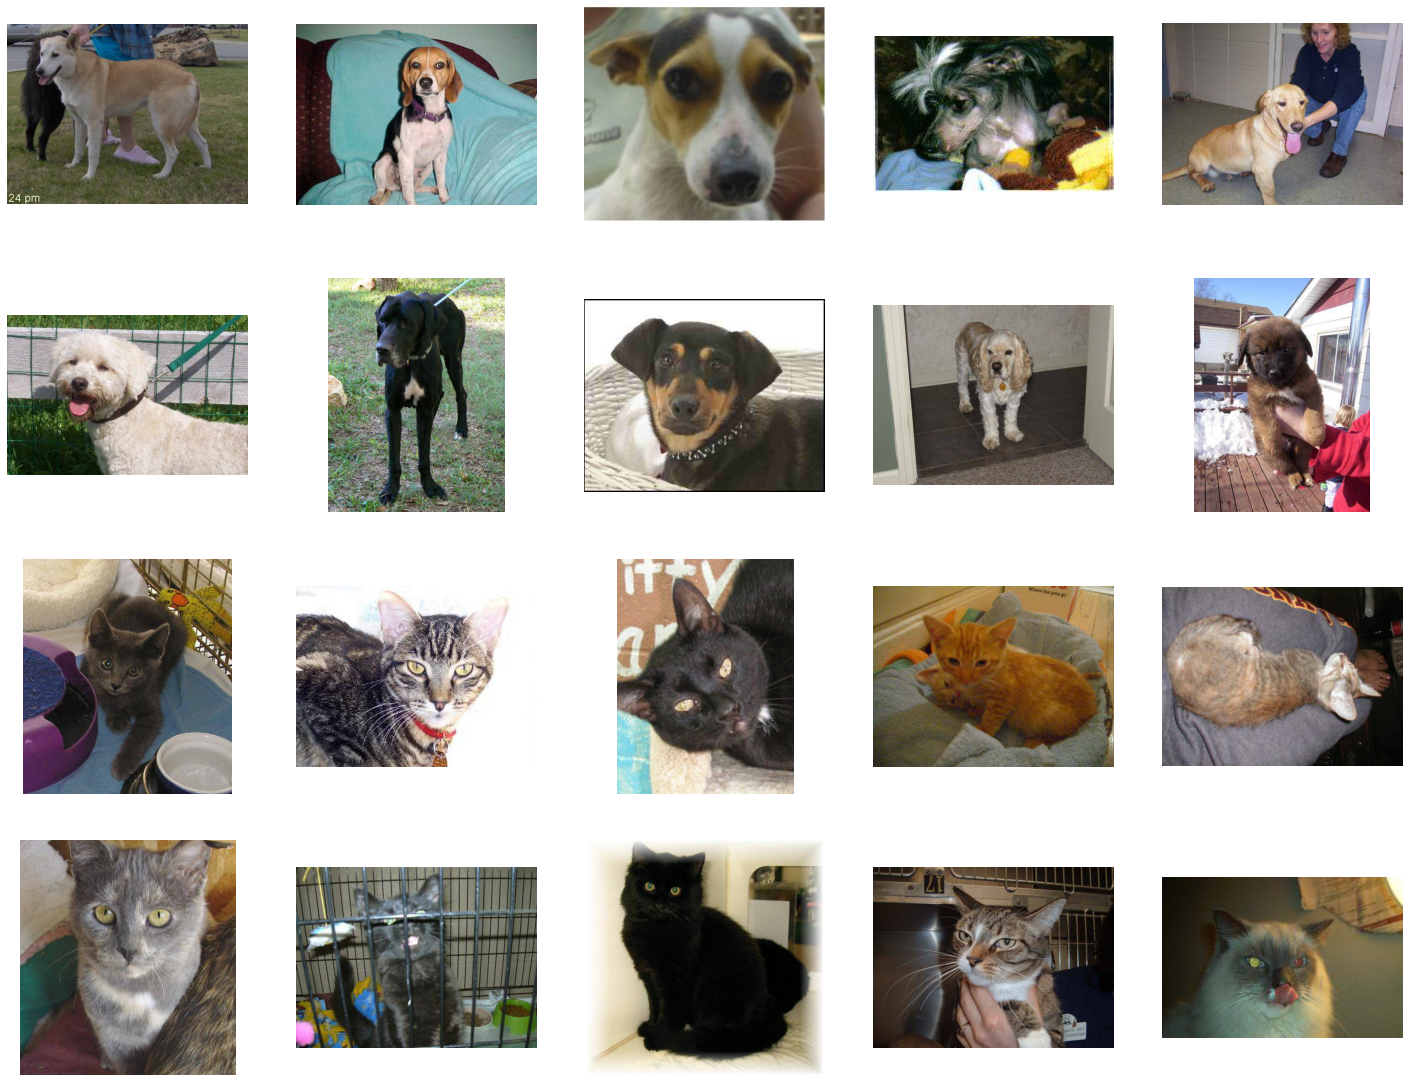

In [41]:
#Visualization of Images
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#Images will be displayed in 5 x 5 configuration for Dogs as well as Cats
n_rows = 5
n_cols = 5

pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(n_cols*5, n_rows*5)

pic_index+=10

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dogs_fname[ pic_index-10:pic_index]
               ]

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cats_fname[ pic_index-10:pic_index] 
               ]

for i, img_path in enumerate(next_dog_pix+next_cat_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(n_rows, n_cols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [42]:
#Perform Data Augmentation
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
)

#Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir, #Source directory for training images
    target_size=(150, 150), #All images will be resized to 150 x 150
    batch_size=20,
    class_mode='binary' #Binary classification
)

#Flow validation images in batches of 20 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [43]:
#Creating CNN model

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 15, 15, 128)      

In [44]:
#Using EarlyStopping and ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [46]:
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.RMSprop(lr=1e-4), metrics=['accuracy'])

In [47]:
history = model.fit(train_generator, epochs=100, validation_data=validation_generator, verbose=1, callbacks=[es, mc] )

Epoch 1/100
100/100 [==============================] - ETA: 0s - loss: 0.6933 - accuracy: 0.5330
Epoch 00001: val_accuracy improved from -inf to 0.57100, saving model to best_model.h5
100/100 [==============================] - 16s 162ms/step - loss: 0.6933 - accuracy: 0.5330 - val_loss: 0.6806 - val_accuracy: 0.5710
Epoch 2/100
100/100 [==============================] - ETA: 0s - loss: 0.6805 - accuracy: 0.5735
Epoch 00002: val_accuracy improved from 0.57100 to 0.57800, saving model to best_model.h5
100/100 [==============================] - 16s 160ms/step - loss: 0.6805 - accuracy: 0.5735 - val_loss: 0.6677 - val_accuracy: 0.5780
Epoch 3/100
100/100 [==============================] - ETA: 0s - loss: 0.6730 - accuracy: 0.5775
Epoch 00003: val_accuracy improved from 0.57800 to 0.59900, saving model to best_model.h5
100/100 [==============================] - 16s 159ms/step - loss: 0.6730 - accuracy: 0.5775 - val_loss: 0.6496 - val_accuracy: 0.5990
Epoch 4/100
100/100 [===================

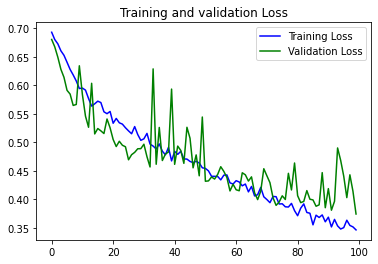

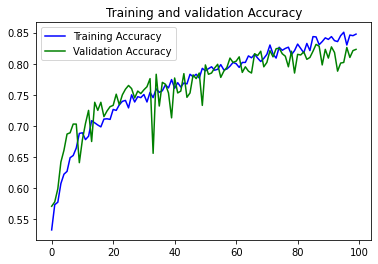

In [62]:
#Accuracy and Loss plots

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()

plt.figure()

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.legend()

plt.show()

In [50]:
#Uploading unseen image file to predict whether the image is a dog or a cat.
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)

  #print(classes[0])
  
  if classes.item(0)==1:
    print('Image is a dog')
    
  else:
    print('Image is a cat')
 

Saving dog.jpg to dog.jpg
Image is a dog


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in true_divide


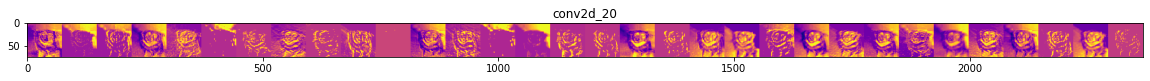

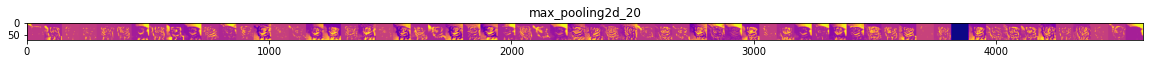

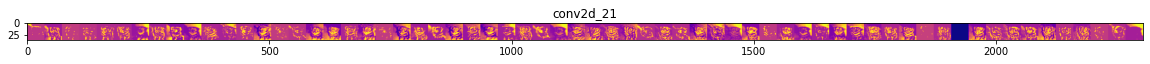

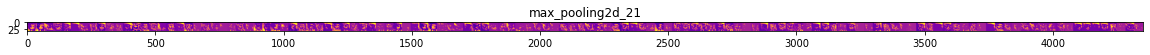

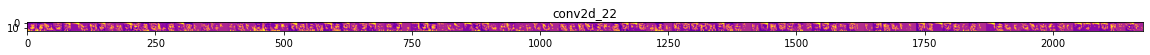

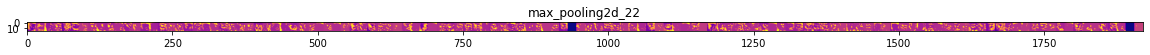

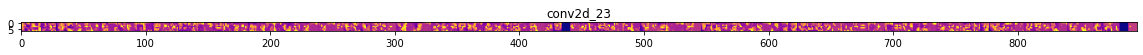

In [56]:
#Image Visualization for all the intermediate layers.
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

'''Let's define a new Model that will take an image as input, and will output
intermediate representations for all layers in the previous model after
the first.'''
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cats_fname]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dogs_fname]

img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

'''Let's run our image through our network, thus obtaining all
intermediate representations for this image.'''
successive_feature_maps = visualization_model.predict(x)

#These are the names of the layers, so we can have them as part of our plot
layer_names = [layer.name for layer in model.layers]


#Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    # Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='plasma' ) 